# Creating Fig. 4.11 for Master thesis

In [28]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
print(torch.__version__)

1.11.0


In [30]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [31]:
window_len = 30


prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [32]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [13]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf


import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/code


In [33]:
file = '10000sims_17params_05_04_nsf_threshold'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/sbi_for_eeg_data/code
/home/ubuntu/results


In [34]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  4.9751243781094526e-05
acceptance rate:  3.322259136212625e-05
acceptance rate:  2.493765586034913e-05
acceptance rate:  1.9960079840319362e-05
acceptance rate:  1.6638935108153077e-05
acceptance rate:  1.4265335235378031e-05
acceptance rate:  1.2484394506866417e-05
acceptance rate:  1.1098779134295228e-05
acceptance rate:  3.996003996003996e-05
acceptance rate:  4.541326067211626e-05
acceptance rate:  6.661115736885928e-05
acceptance rate:  6.149116064565719e-05
acceptance rate:  7.137758743754462e-05
acceptance rate:  7.328447701532311e-05
acceptance rate:  8.119925046845722e-05
acceptance rate:  7.642563198118753e-05
acceptance rate:  7.218212104386451e-05
acceptance rate:  7.364544976328249e-05
acceptance rate:  7.9960019990005e-05
acceptance rate:  7.615421227986673e-05
acceptance rate:  7.723761926397092e-05
acceptance rate:  7.388092133854845e-05
acceptance rate:  7.080383173677634e-05
acceptance rate:  7.596961215513

In [35]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [36]:
file = '10000sims_17params_11_04_nsf_supra_ratio'




thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

In [37]:
samples_supra_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [38]:
s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size 17 
early stopparam size17  
17param sizeearly stop
early stopparam size  param size 200.017  
200.0param sizeearly stop17
param size
200.0param size    17
param size 
 171717200.0early stop 



early stop early stop200.017 

 param size 200.0200.0 param size 
17 

param size early stop
17 param size 17 200.0

param size  17

 17
param size  17
num_params 17num_params
num_params  17joblib will run over 1 jobs
num_params 17

num_params17
joblib will run over 1 jobsjoblib will run over 1 jobs 
17

num_paramsnum_params  joblib will run over 1 jobs1717


joblib will run over 1 jobs
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobs
num_params 17

joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON modelLoading custom mechanism files from /home/ub

[Done]
running trial 1 on 1 cores
Simulation time: 190.0 ms...
Simulation time: 0.03 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.68489525 27.602282
 27.51966707]
param size 17
early stop 200.0
param size  17
obs [-0.59760178 -0.59840714 -0.59920666 ... 17.65415527 17.61356718
 17.57291843]
param size Simulation time: 10.0 ms...17

early stop num_params 200.017

param size joblib will run over 1 jobs 
17
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.9min
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.70911444 26.62485476
 26.54056073]
param size 17num_params
 17
early stopjoblib will run over 1 jobs 
200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.9min
Building 

early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  3.8min
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 50.0 ms...
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time

Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulat

Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.95202334 27.86474729
 27.77746946]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  8.5min
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 m

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 10.5min
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.41951838 24.34035087
 24.26122324]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 10.5min
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 23.15249705 23.08182261
 23.01110889]
param size 17
early stop 200.0
param size  17
n

param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 12.6min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 23.88768297 23.81052515
 23.73337824]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 12.7min
joblib will run over 1 jobs
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26

Simulation time: 20.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 180.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.59280032 27.50261805
 27.41247422]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 1

Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.08253942 31.98170637
 31.88082738]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 17.0min
joblib will run over 1 jobs
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 70.0 ms...
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...



joblib will run over 1 jobs
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...

Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.86370103 26.78089994
 26.69811266]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 m

In [39]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)
#s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size param size17 
param size17 17early stopparam size

early stop early stop  param size200.0200.017

param size param size  param size param size   17
17param size 
200.0
 17early stop17

 17early stop 
early stop200.017early stop
param size  200.0

 
param size 200.0early stop param size 200.0 17

17
param size 
 17
param size  17
  17
200.0
param size  17
num_paramsnum_params num_params num_params 17
17
17 num_params
joblib will run over 1 jobs17 

joblib will run over 1 jobs
17
joblib will run over 1 jobsnum_paramsnum_paramsjoblib will run over 1 jobs
 joblib will run over 1 jobs
num_params17
 
17
 17[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

Simulation time: 190.0 ms...
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.12677284 12.08754476
 12.04833112]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.8min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 11.6900397  11.64834154
 11.60669589]
param size 17
early stop 200.0
param size  17
obs [-0.59760178 -0.59840714 -0.59920666 ... 10.41676971 10.38354872
 10.3503402 ]
param size 17
num_paramsearly stop [Done] 200.017
param size  
17

running trial 1 on 1 cores
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.9min
Simulation time: 0.03 ms...
num_params 17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building th

Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Si

Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation ti

Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation tim

early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  41 tasks      | elapsed: 10.6min
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.07566119 12.03768281
 11.99970504]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 10.7min
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
obs [-0.58253822 -0.58253239 -0.58250309 ... 10.71150951 10.67707045
 10.64264244]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 10.8min
Simulation time: 150.0 ms...
[

  9.89601661]

param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 12.8min
Simulation time: 160.0 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.85324164  9.81973266
  9.78625552]
param size 17
early stop 200.0
param size  17
Simulation time: 30.0 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 12.8min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.56036956  9.52972165
  9.49908216]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 12.9min
Building the NEURON model
Simu

Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.83910399 12.79824759
 12.7574209 ]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 15.0min
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
obs [-0.59760178 -0.59840714 -0

Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simula

Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 11.007483   10.97163544
 10.93580353]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 19.5min
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 m

Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.61946655  9.58864575
  9.55783549]
param sizeSimulation time: 160.0 ms... 
17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 

In [40]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [41]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param size 17param size param size17
param sizeearly stop  
17 
200.0early stop
 param size  17param size
17 
17early stop param size200.0

 early stopparam size 17200.0200.0param size early stopparam size 

200.0

  param size param size early stopparam size     200.017
17

1717param size 
17 

 early stop 200.0
17param size  
1717

early stop 200.0
num_paramsparam size   num_params1717
 num_params
num_params 17 joblib will run over 1 jobs
1717

num_paramsjoblib will run over 1 jobs
 num_params
17num_params  17joblib will run over 1 jobs17


joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobs
num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.61231498 29.5177961
 29.42328135]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Done]
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.9min
running trial 1 on 1 cores
obs [-0.59760178 -0.59840714 -0.59920666 ... 22.83811768 22.76832039
 22.69851282]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 0.03 ms...
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.9min
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]Building the NEURON model
running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
obs [-0.51870999 -0.51755829 -0.51636508 ... 19.10780895 19.04350711
 18.97924172]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_


Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 50.0 ms...
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...Simulation time: 30.0 ms...

Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Sim

Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simul

Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.22536393 27.13122581
 27.0371042 ]
param size 17
early stop 200.0
param size  17
Simulation time: 90.0 ms...
num_params 17[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  8.6min

joblib will run over 1 jobs
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.

Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 34.44932934 34.32046897
 34.19173785]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 10.7min
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 52.89029141 52.7307531
 52.57120354]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 10.8min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 m

Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 49.6003786  49.43588367
 49.27150442]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 12.9min

Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...Simulation time: 180.0 ms...

Simulation time: 2

Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 33.6882655  33.57246663
 33.45676131]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 15.0min
Simulation time: 50.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.

Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
obs [-0.51238838 -0.5115904  -0.51075839 ... 40.70604891 40.53568332
 40.36553492]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 17.3min
Simulation time: 30.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms..

Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
obs [-0.59651979 -0.59717069 -0.59779298 ... 27.49822689 27.41261598
 27.32699718]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 180.0 ms...
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 19.6min
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 47.03253406 46.86693925
 46.70141937]
param size 17
early stop 200.0

Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
obs [ 0.77086017  0.79066087  0.81060083 ... 34.10742845 33.99103675
 33.87473628]
param size 17
early stop 200.0
param size  17
num_params[Parallel(n_jobs=8)]: Done  91 out of 100 | elapsed: 22.1min r

In [42]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


mean_s = torch.mean(s_x_torch_s, 0)
std_s = torch.std(s_x_torch_s, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower_s = mean_s - 1.96 * std_s

upper_s = mean_s + 1.96 * std_s


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



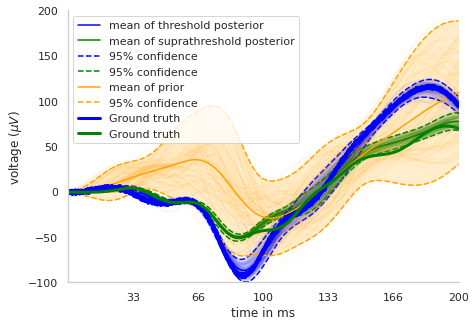

In [43]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')
sns.set_context('notebook')

fig1, ax = plt.subplots(1, 1, figsize=(7,5))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue', label='mean of threshold posterior')
plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_s:
    plt.plot(s, alpha=0.05, color='green')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)

plt.plot(lower_s, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_s, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_s, y2=upper_s, color='green', alpha=0.1)

#plt.xlim(0, 5100)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
#plt.xlim(0, 6300)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='blue', linewidth=3, linestyle='-', label='Ground truth')
plt.plot(obs_real2, linestyle = '-', label='Ground truth', color='green', linewidth=3)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 6000)

sns.despine()
plt.legend()